In [176]:
import pysplit
import pandas as pd
import numpy as np
from wrf import getvar, get_basemap, latlon_coords
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import matplotlib as mpl
import xarray as xr
from itertools import product
import matplotlib.patheffects as path_effects

In [177]:
def regions_to_str(number):
    
    m = {
         1: 'West Coast',
         3: 'Central Interior',
         4: 'North Slope',
         5: 'Northeast Interior',
         6: 'Southeast Interior'
        }

    try:
        out = m[number]
        return out
    
    except:
        raise ValueError('Not a region')

In [178]:
wrffile = Dataset('/glade/scratch/molina/basile/wrfout_d01_2002-12-30_18:00:00.nc4')
tfile = getvar(wrffile, 'tk')
m = get_basemap(tfile)
lats, lons = latlon_coords(tfile)

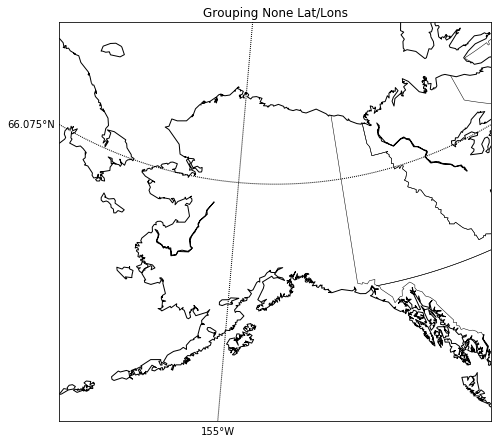

In [179]:
fig = plt.figure(figsize=(6.,6.))
ax1 = fig.add_axes([0.0, 0., 1., 1.]) 
ax1.set_title('Grouping None Lat/Lons', fontsize=12)
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.drawparallels([66.075],labels=[1,0,0,0])
m.drawmeridians([-155],labels=[0,0,0,1])
plt.show()

In [180]:
which_climate='hist'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion1_{which_climate}.nc")
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion3_{which_climate}.nc")
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion4_{which_climate}.nc")
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion5_{which_climate}.nc")
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion6_{which_climate}.nc")

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion1_{which_climate}.nc")
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion3_{which_climate}.nc")
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion4_{which_climate}.nc")
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion5_{which_climate}.nc")
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion6_{which_climate}.nc")

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion1_{which_climate}.nc")
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion3_{which_climate}.nc")
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion4_{which_climate}.nc")
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion5_{which_climate}.nc")
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion6_{which_climate}.nc")

land_1c=np.hstack([ds1.land_pointsx,ds6.land_pointsx,ds11.land_pointsx]).shape[0]
land_3c=np.hstack([ds2.land_pointsx,ds7.land_pointsx,ds12.land_pointsx]).shape[0]
land_4c=np.hstack([ds3.land_pointsx,ds8.land_pointsx,ds13.land_pointsx]).shape[0]
land_5c=np.hstack([ds4.land_pointsx,ds9.land_pointsx,ds14.land_pointsx]).shape[0]
land_6c=np.hstack([ds5.land_pointsx,ds10.land_pointsx,ds15.land_pointsx]).shape[0]

goa_1c=np.hstack([ds1.goa_pointsx,ds6.goa_pointsx,ds11.goa_pointsx]).shape[0]
goa_3c=np.hstack([ds2.goa_pointsx,ds7.goa_pointsx,ds12.goa_pointsx]).shape[0]
goa_4c=np.hstack([ds3.goa_pointsx,ds8.goa_pointsx,ds13.goa_pointsx]).shape[0]
goa_5c=np.hstack([ds4.goa_pointsx,ds9.goa_pointsx,ds14.goa_pointsx]).shape[0]
goa_6c=np.hstack([ds5.goa_pointsx,ds10.goa_pointsx,ds15.goa_pointsx]).shape[0]

ao_1c=np.hstack([ds1.ao_pointsx,ds6.ao_pointsx,ds11.ao_pointsx]).shape[0]
ao_3c=np.hstack([ds2.ao_pointsx,ds7.ao_pointsx,ds12.ao_pointsx]).shape[0]
ao_4c=np.hstack([ds3.ao_pointsx,ds8.ao_pointsx,ds13.ao_pointsx]).shape[0]
ao_5c=np.hstack([ds4.ao_pointsx,ds9.ao_pointsx,ds14.ao_pointsx]).shape[0]
ao_6c=np.hstack([ds5.ao_pointsx,ds10.ao_pointsx,ds15.ao_pointsx]).shape[0]

bs_1c=np.hstack([ds1.bs_pointsx,ds6.bs_pointsx,ds11.bs_pointsx]).shape[0]
bs_3c=np.hstack([ds2.bs_pointsx,ds7.bs_pointsx,ds12.bs_pointsx]).shape[0]
bs_4c=np.hstack([ds3.bs_pointsx,ds8.bs_pointsx,ds13.bs_pointsx]).shape[0]
bs_5c=np.hstack([ds4.bs_pointsx,ds9.bs_pointsx,ds14.bs_pointsx]).shape[0]
bs_6c=np.hstack([ds5.bs_pointsx,ds10.bs_pointsx,ds15.bs_pointsx]).shape[0]

In [181]:
none_goa_1c=0
none_bs_1c=0
none_ao_1c=0
for i,j in zip(ds1.none_pointsx.values,ds1.none_pointsy.values):
    if j>=66.075:
        none_ao_1c+=1
    if j<66.075 and i<-155:
        none_bs_1c+=1
    if j<66.075 and i>-155:
        none_goa_1c+=1
        
none_goa_3c=0
none_bs_3c=0
none_ao_3c=0
for i,j in zip(ds3.none_pointsx.values,ds3.none_pointsy.values):
    if j>=66.075:
        none_ao_3c+=1
    if j<66.075 and i<-155:
        none_bs_3c+=1
    if j<66.075 and i>-155:
        none_goa_3c+=1
        
none_goa_4c=0
none_bs_4c=0
none_ao_4c=0
for i,j in zip(ds4.none_pointsx.values,ds4.none_pointsy.values):
    if j>=66.075:
        none_ao_4c+=1
    if j<66.075 and i<-155:
        none_bs_4c+=1
    if j<66.075 and i>-155:
        none_goa_4c+=1
        
none_goa_5c=0
none_bs_5c=0
none_ao_5c=0
for i,j in zip(ds5.none_pointsx.values,ds5.none_pointsy.values):
    if j>=66.075:
        none_ao_5c+=1
    if j<66.075 and i<-155:
        none_bs_5c+=1
    if j<66.075 and i>-155:
        none_goa_5c+=1
        
none_goa_6c=0
none_bs_6c=0
none_ao_6c=0
for i,j in zip(ds6.none_pointsx.values,ds6.none_pointsy.values):
    if j>=66.075:
        none_ao_6c+=1
    if j<66.075 and i<-155:
        none_bs_6c+=1
    if j<66.075 and i>-155:
        none_goa_6c+=1

In [182]:
which_climate='pgw'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion1_{which_climate}.nc")
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion3_{which_climate}.nc")
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion4_{which_climate}.nc")
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion5_{which_climate}.nc")
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jun_subregion6_{which_climate}.nc")

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion1_{which_climate}.nc")
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion3_{which_climate}.nc")
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion4_{which_climate}.nc")
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion5_{which_climate}.nc")
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_jul_subregion6_{which_climate}.nc")

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion1_{which_climate}.nc")
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion3_{which_climate}.nc")
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion4_{which_climate}.nc")
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion5_{which_climate}.nc")
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/originfile_aug_subregion6_{which_climate}.nc")

land_1f=np.hstack([ds1.land_pointsx,ds6.land_pointsx,ds11.land_pointsx]).shape[0]
land_3f=np.hstack([ds2.land_pointsx,ds7.land_pointsx,ds12.land_pointsx]).shape[0]
land_4f=np.hstack([ds3.land_pointsx,ds8.land_pointsx,ds13.land_pointsx]).shape[0]
land_5f=np.hstack([ds4.land_pointsx,ds9.land_pointsx,ds14.land_pointsx]).shape[0]
land_6f=np.hstack([ds5.land_pointsx,ds10.land_pointsx,ds15.land_pointsx]).shape[0]

goa_1f=np.hstack([ds1.goa_pointsx,ds6.goa_pointsx,ds11.goa_pointsx]).shape[0]
goa_3f=np.hstack([ds2.goa_pointsx,ds7.goa_pointsx,ds12.goa_pointsx]).shape[0]
goa_4f=np.hstack([ds3.goa_pointsx,ds8.goa_pointsx,ds13.goa_pointsx]).shape[0]
goa_5f=np.hstack([ds4.goa_pointsx,ds9.goa_pointsx,ds14.goa_pointsx]).shape[0]
goa_6f=np.hstack([ds5.goa_pointsx,ds10.goa_pointsx,ds15.goa_pointsx]).shape[0]

ao_1f=np.hstack([ds1.ao_pointsx,ds6.ao_pointsx,ds11.ao_pointsx]).shape[0]
ao_3f=np.hstack([ds2.ao_pointsx,ds7.ao_pointsx,ds12.ao_pointsx]).shape[0]
ao_4f=np.hstack([ds3.ao_pointsx,ds8.ao_pointsx,ds13.ao_pointsx]).shape[0]
ao_5f=np.hstack([ds4.ao_pointsx,ds9.ao_pointsx,ds14.ao_pointsx]).shape[0]
ao_6f=np.hstack([ds5.ao_pointsx,ds10.ao_pointsx,ds15.ao_pointsx]).shape[0]

bs_1f=np.hstack([ds1.bs_pointsx,ds6.bs_pointsx,ds11.bs_pointsx]).shape[0]
bs_3f=np.hstack([ds2.bs_pointsx,ds7.bs_pointsx,ds12.bs_pointsx]).shape[0]
bs_4f=np.hstack([ds3.bs_pointsx,ds8.bs_pointsx,ds13.bs_pointsx]).shape[0]
bs_5f=np.hstack([ds4.bs_pointsx,ds9.bs_pointsx,ds14.bs_pointsx]).shape[0]
bs_6f=np.hstack([ds5.bs_pointsx,ds10.bs_pointsx,ds15.bs_pointsx]).shape[0]

In [183]:
none_goa_1f=0
none_bs_1f=0
none_ao_1f=0
for i,j in zip(ds1.none_pointsx.values,ds1.none_pointsy.values):
    if j>=66.075:
        none_ao_1f+=1
    if j<66.075 and i<-155:
        none_bs_1f+=1
    if j<66.075 and i>-155:
        none_goa_1f+=1
        
none_goa_3f=0
none_bs_3f=0
none_ao_3f=0
for i,j in zip(ds3.none_pointsx.values,ds3.none_pointsy.values):
    if j>=66.075:
        none_ao_3f+=1
    if j<66.075 and i<-155:
        none_bs_3f+=1
    if j<66.075 and i>-155:
        none_goa_3f+=1
        
none_goa_4f=0
none_bs_4f=0
none_ao_4f=0
for i,j in zip(ds4.none_pointsx.values,ds4.none_pointsy.values):
    if j>=66.075:
        none_ao_4f+=1
    if j<66.075 and i<-155:
        none_bs_4f+=1
    if j<66.075 and i>-155:
        none_goa_4f+=1
        
none_goa_5f=0
none_bs_5f=0
none_ao_5f=0
for i,j in zip(ds5.none_pointsx.values,ds5.none_pointsy.values):
    if j>=66.075:
        none_ao_5f+=1
    if j<66.075 and i<-155:
        none_bs_5f+=1
    if j<66.075 and i>-155:
        none_goa_5f+=1
        
none_goa_6f=0
none_bs_6f=0
none_ao_6f=0
for i,j in zip(ds6.none_pointsx.values,ds6.none_pointsy.values):
    if j>=66.075:
        none_ao_6f+=1
    if j<66.075 and i<-155:
        none_bs_6f+=1
    if j<66.075 and i>-155:
        none_goa_6f+=1

In [184]:
total_1c=land_1c+goa_1c+ao_1c+bs_1c+none_goa_1c+none_ao_1c+none_bs_1c
total_3c=land_3c+goa_3c+ao_3c+bs_3c+none_goa_3c+none_ao_3c+none_bs_3c
total_4c=land_4c+goa_4c+ao_4c+bs_4c+none_goa_4c+none_ao_4c+none_bs_4c
total_5c=land_5c+goa_5c+ao_5c+bs_5c+none_goa_5c+none_ao_5c+none_bs_5c
total_6c=land_6c+goa_6c+ao_6c+bs_6c+none_goa_6c+none_ao_6c+none_bs_6c

total_1f=land_1f+goa_1f+ao_1f+bs_1f+none_goa_1f+none_ao_1f+none_bs_1f
total_3f=land_3f+goa_3f+ao_3f+bs_3f+none_goa_3f+none_ao_3f+none_bs_3f
total_4f=land_4f+goa_4f+ao_4f+bs_4f+none_goa_4f+none_ao_4f+none_bs_4f
total_5f=land_5f+goa_5f+ao_5f+bs_5f+none_goa_5f+none_ao_5f+none_bs_5f
total_6f=land_6f+goa_6f+ao_6f+bs_6f+none_goa_6f+none_ao_6f+none_bs_6f

In [185]:
land_1c=(land_1c/total_1c)*100
land_3c=(land_3c/total_3c)*100
land_4c=(land_4c/total_4c)*100
land_5c=(land_5c/total_5c)*100
land_6c=(land_6c/total_6c)*100

goa_1c=((goa_1c+none_goa_1c)/total_1c)*100
goa_3c=((goa_3c+none_goa_3c)/total_3c)*100
goa_4c=((goa_4c+none_goa_4c)/total_4c)*100
goa_5c=((goa_5c+none_goa_5c)/total_5c)*100
goa_6c=((goa_6c+none_goa_6c)/total_6c)*100

ao_1c=((ao_1c+none_ao_1c)/total_1c)*100
ao_3c=((ao_3c+none_ao_3c)/total_3c)*100
ao_4c=((ao_4c+none_ao_4c)/total_4c)*100
ao_5c=((ao_5c+none_ao_5c)/total_5c)*100
ao_6c=((ao_6c+none_ao_6c)/total_6c)*100

bs_1c=((bs_1c+none_bs_1c)/total_1c)*100
bs_3c=((bs_3c+none_bs_3c)/total_3c)*100
bs_4c=((bs_4c+none_bs_4c)/total_4c)*100
bs_5c=((bs_5c+none_bs_5c)/total_5c)*100
bs_6c=((bs_6c+none_bs_6c)/total_6c)*100

land_1f=(land_1f/total_1f)*100
land_3f=(land_3f/total_3f)*100
land_4f=(land_4f/total_4f)*100
land_5f=(land_5f/total_5f)*100
land_6f=(land_6f/total_6f)*100

goa_1f=((goa_1f+none_goa_1f)/total_1f)*100
goa_3f=((goa_3f+none_goa_3f)/total_3f)*100
goa_4f=((goa_4f+none_goa_4f)/total_4f)*100
goa_5f=((goa_5f+none_goa_5f)/total_5f)*100
goa_6f=((goa_6f+none_goa_6f)/total_6f)*100

ao_1f=((ao_1f+none_ao_1f)/total_1f)*100
ao_3f=((ao_3f+none_ao_3f)/total_3f)*100
ao_4f=((ao_4f+none_ao_4f)/total_4f)*100
ao_5f=((ao_5f+none_ao_5f)/total_5f)*100
ao_6f=((ao_6f+none_ao_6f)/total_6f)*100

bs_1f=((bs_1f+none_bs_1f)/total_1f)*100
bs_3f=((bs_3f+none_bs_3f)/total_3f)*100
bs_4f=((bs_4f+none_bs_4f)/total_4f)*100
bs_5f=((bs_5f+none_bs_5f)/total_5f)*100
bs_6f=((bs_6f+none_bs_6f)/total_6f)*100

In [186]:
bars1=[goa_1c,goa_3c,goa_4c,goa_5c,goa_6c]
bars2=[bs_1c,bs_3c,bs_4c,bs_5c,bs_6c]
bars3=[ao_1c,ao_3c,ao_4c,ao_5c,ao_6c]
bars4=[land_1c,land_3c,land_4c,land_5c,land_6c]

bars5=[goa_1f,goa_3f,goa_4f,goa_5f,goa_6f]
bars6=[bs_1f,bs_3f,bs_4f,bs_5f,bs_6f]
bars7=[ao_1f,ao_3f,ao_4f,ao_5f,ao_6f]
bars8=[land_1f,land_3f,land_4f,land_5f,land_6f]

names = [regions_to_str(1)+' HIST',regions_to_str(1)+' PGW',
         '',
         regions_to_str(3)+' HIST',regions_to_str(3)+' PGW',
         '',
         regions_to_str(4)+' HIST',regions_to_str(4)+' PGW',
         '',
         regions_to_str(5)+' HIST',regions_to_str(5)+' PGW',
         '',
         regions_to_str(6)+' HIST',regions_to_str(6)+' PGW']

In [187]:
bars12 = np.add(bars1, bars2).tolist()
bars13 = np.add(bars12, bars3).tolist()

bars56 = np.add(bars5, bars6).tolist()
bars57 = np.add(bars56, bars7).tolist()

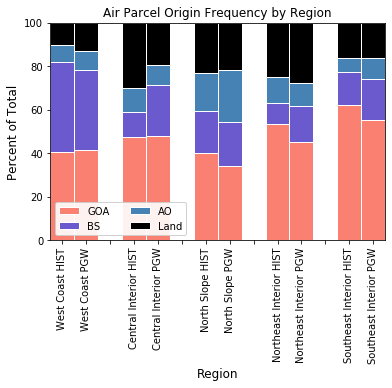

In [189]:
plt.title("Air Parcel Origin Frequency by Region")

plt.bar([0,3,6,9,12], bars1, color='salmon', edgecolor='white', width=1, label='GOA')
plt.bar([0,3,6,9,12], bars2, bottom=bars1, color='slateblue', edgecolor='white', width=1, label='BS')
plt.bar([0,3,6,9,12], bars3, bottom=bars12, color='steelblue', edgecolor='white', width=1, label='AO')
plt.bar([0,3,6,9,12], bars4, bottom=bars13, color='k', edgecolor='white', width=1, label='Land')

plt.bar([1,4,7,10,13], bars5, color='salmon', edgecolor='white', width=1)
plt.bar([1,4,7,10,13], bars6, bottom=bars5, color='slateblue', edgecolor='white', width=1)
plt.bar([1,4,7,10,13], bars7, bottom=bars56,color='steelblue', edgecolor='white', width=1)
plt.bar([1,4,7,10,13], bars8, bottom=bars57,color='k', edgecolor='white', width=1)

plt.xticks(np.arange(0,14), names, rotation=90)
plt.legend(ncol=2, framealpha=0.9)

plt.xlabel("Region", fontsize=12)
plt.ylabel("Percent of Total", fontsize=12)

plt.margins(x=0.,y=0.)

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_freq_bar2.png", bbox_inches='tight', dpi=200)